In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import os

,name,type,variable,value,year,crime_type
50,"Fort Worth, Texas",place,rate,327.455989,2009,Aggravated assault
158,"Fort Worth, Texas",place,rate,51.143401,2009,Forcible rape
138,"Fort Worth, Texas",place,rate,6.081918,2009,Murder and nonnegligent manslaughter
77,"Fort Worth, Texas",place,rate,8.440141,2010,Murder and nonnegligent manslaughter
127,"Fort Worth, Texas",place,rate,345.911823,2010,Aggravated assault
116,"Fort Worth, Texas",place,rate,42.602618,2010,Forcible rape
21,"Fort Worth, Texas",place,rate,6.342470,2011,Murder and nonnegligent manslaughter
157,"Fort Worth, Texas",place,rate,383.719409,2011,Aggravated assault
140,"Fort Worth, Texas",place,rate,46.247174,2011,Forcible rape
6,"Fort Worth, Texas",place,rate,50.772561,2012,Forcible rape


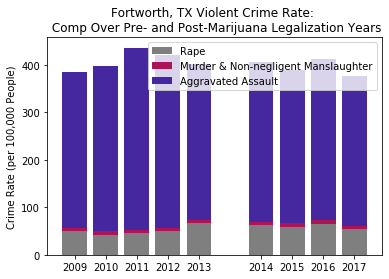

In [3]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

file_to_load1 = os.path.join("Output CSVs", "Fortworth.csv")

# load your city's CSV in a dataframe
TXcrimeDF = pd.read_csv(file_to_load1)

# filter whole TX dataset to just showing rates, not counts:
TXcrimeRates = TXcrimeDF.loc[TXcrimeDF["variable"] == "rate"]

# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
TXcrimeRatesYears = TXcrimeRates.loc[TXcrimeRates["year"].isin(years)]
TXcrimeRatesYears = TXcrimeRatesYears.drop_duplicates()
# remove extraneous columns
TXcrimeRatesYears = TXcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
TXcrimeRatesYears = TXcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)"]
TXcrimeRatesViolent = TXcrimeRatesYears.loc[TXcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
TXrape = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
TXrape = TXrape.set_index(["year"])

TXmurder = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
TXmurder = TXmurder.set_index(["year"])

TXassault = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["crime_type"] == "Aggravated assault"]
TXassault = TXassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
TX_x_axis = TXrape.index
# each bar is a line here
p1 = plt.bar(TX_x_axis, TXrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(TX_x_axis, TXmurder["value"].values, color='#AD1457', bottom=TXrape["value"].values)
p3 = plt.bar(TX_x_axis, TXassault["value"].values, color='#4527A0', bottom=(TXmurder["value"] + TXrape["value"]).values)

tick_locations = [value for value in TX_x_axis]
plt.xticks(tick_locations, years)
plt.title("Fortworth, TX Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"))
TXcrimeRatesViolent

,name,type,variable,value,year,crime_type
143,"Fort Worth, Texas",place,rate,3257.143489,2009,Larceny
24,"Fort Worth, Texas",place,rate,200.288615,2009,Robbery
142,"Fort Worth, Texas",place,rate,294.696568,2009,Motor vehicle theft
93,"Fort Worth, Texas",place,rate,4960.080502,2009,Property crime
54,"Fort Worth, Texas",place,rate,1408.240446,2009,Burglary
66,"Fort Worth, Texas",place,rate,178.180761,2010,Robbery
133,"Fort Worth, Texas",place,rate,1252.892088,2010,Burglary
160,"Fort Worth, Texas",place,rate,4701.024740,2010,Property crime
173,"Fort Worth, Texas",place,rate,330.103305,2010,Motor vehicle theft
153,"Fort Worth, Texas",place,rate,3118.029348,2010,Larceny


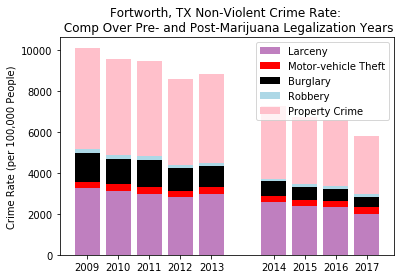

In [4]:
# Non-violent crime categorization for TX starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
TXcrimeRatesNonViolent = TXcrimeRates.loc[TXcrimeRates["crime_type"].isin(nonVcrime)]
TXcrimeRatesNonViolent = TXcrimeRatesNonViolent.drop_duplicates()
TXcrimeRatesNonViolentYears = TXcrimeRatesNonViolent.loc[TXcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
TXcrimeRatesNVComparison = TXcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
TXcrimeRatesNVComparison = TXcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
TXlarceny = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
TXlarceny = TXlarceny.set_index(["year"])

TXmotor = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
TXmotor = TXmotor.set_index(["year"])

TXburglary = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Burglary"]
TXburglary = TXburglary.set_index(["year"])

TXrobbery = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Robbery"]
TXrobbery = TXrobbery.set_index(["year"])

TXpropCrime = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Property crime"]
TXpropCrime = TXpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
TX_x_axis = TXlarceny.index
# each bar is a line here
p1 = plt.bar(TX_x_axis, TXlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(TX_x_axis, TXmotor["value"].values, color='red', bottom=TXlarceny["value"].values)
p3 = plt.bar(TX_x_axis, TXburglary["value"].values, color='black', bottom=(TXmotor["value"] + TXlarceny["value"]).values)
p4 = plt.bar(TX_x_axis, TXrobbery["value"].values, color="#ADD8E6", bottom = (TXmotor["value"] + TXlarceny["value"] + TXburglary["value"]).values)
p5 = plt.bar(TX_x_axis, TXpropCrime["value"].values, color='pink', bottom = (TXmotor["value"] + TXlarceny["value"] + TXburglary["value"] + TXrobbery["value"]).values)

tick_locations = [value for value in TX_x_axis]
plt.xticks(tick_locations, years)
plt.title("Fortworth, TX Non-Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"))
TXcrimeRatesNVComparison